![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [19]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("/Users/kcire/Library/CloudStorage/GoogleDrive-erickcarrillo2807@gmail.com/Mi unidad/Programacion/Python/Projects/KMeans/Data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [20]:
# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False

In [21]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [22]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

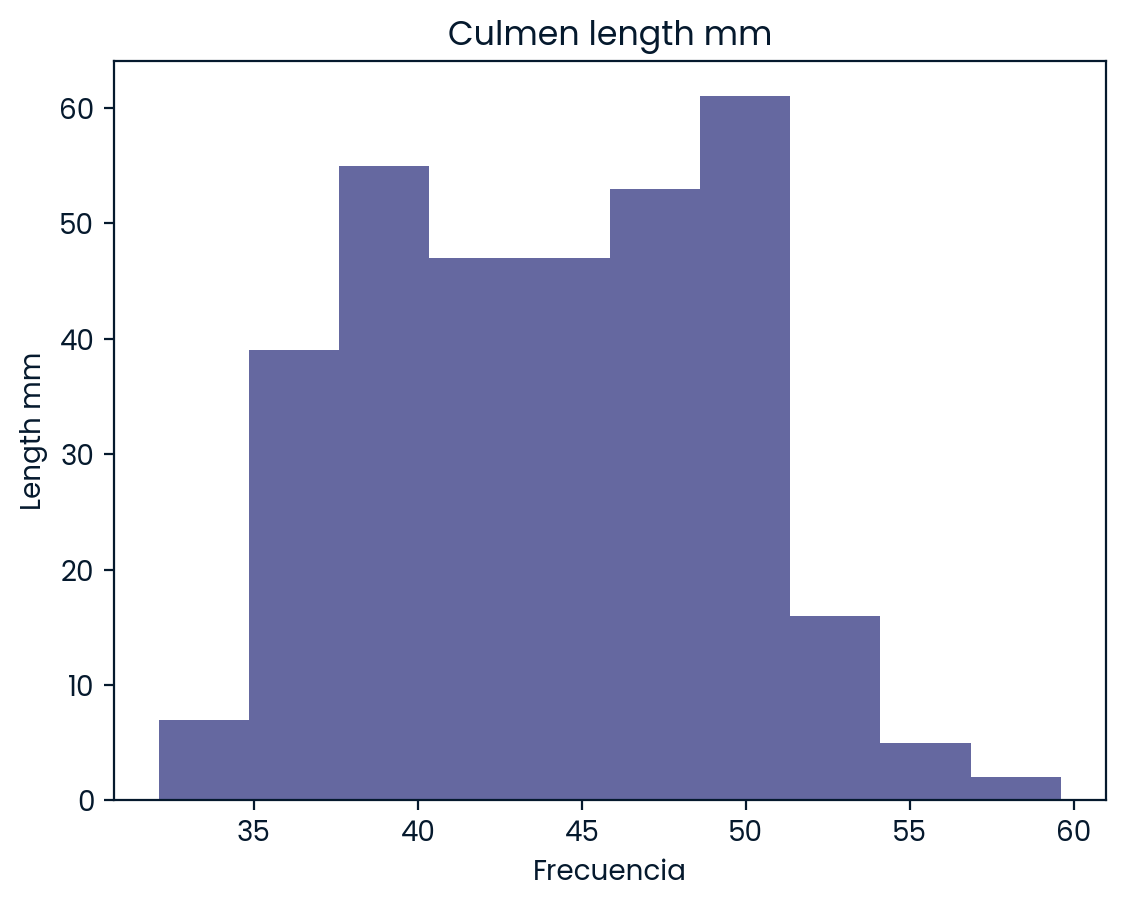

In [23]:
plt.hist(penguins_df['culmen_length_mm'],bins=10)
plt.title('Culmen length mm')
plt.ylabel('Length mm')
plt.xlabel('Frecuencia')
plt.show()

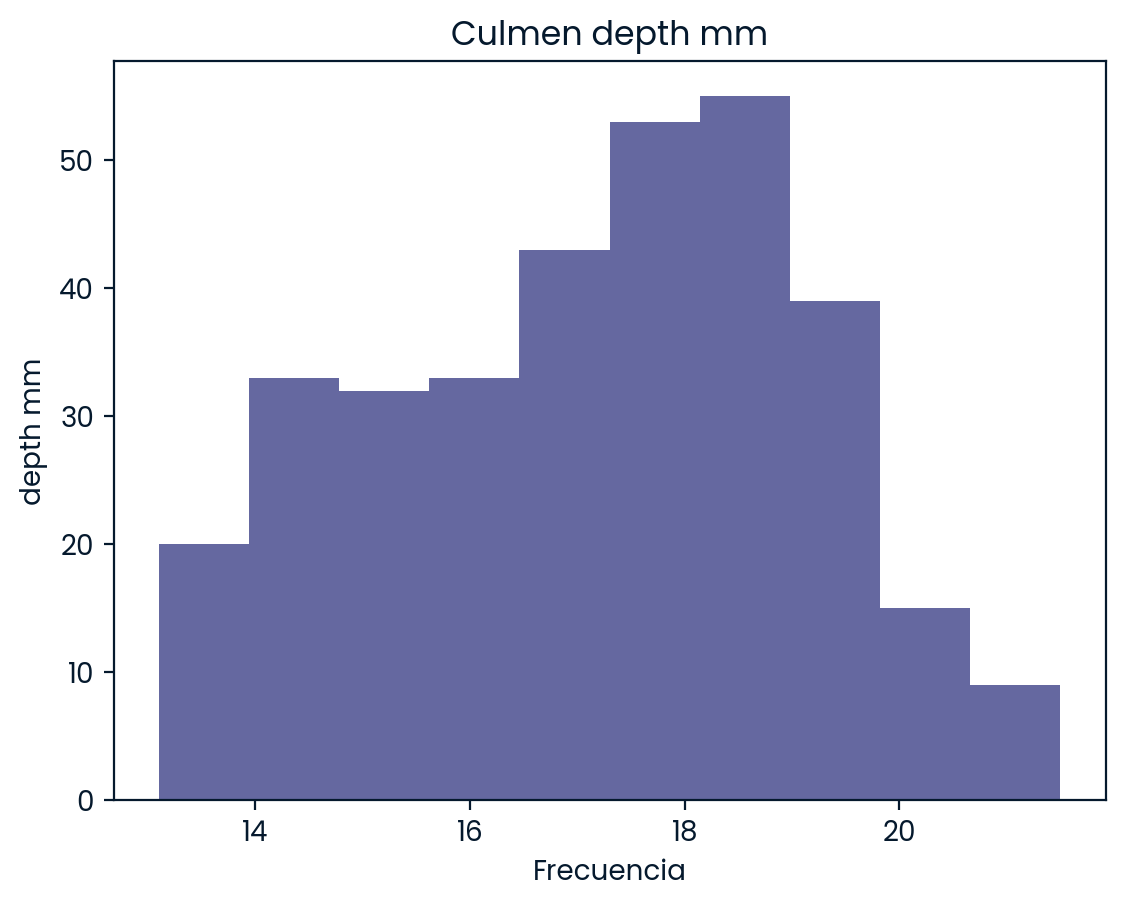

In [24]:
plt.hist(penguins_df['culmen_depth_mm'],bins=10)
plt.title('Culmen depth mm')
plt.ylabel('depth mm')
plt.xlabel('Frecuencia')
plt.show()

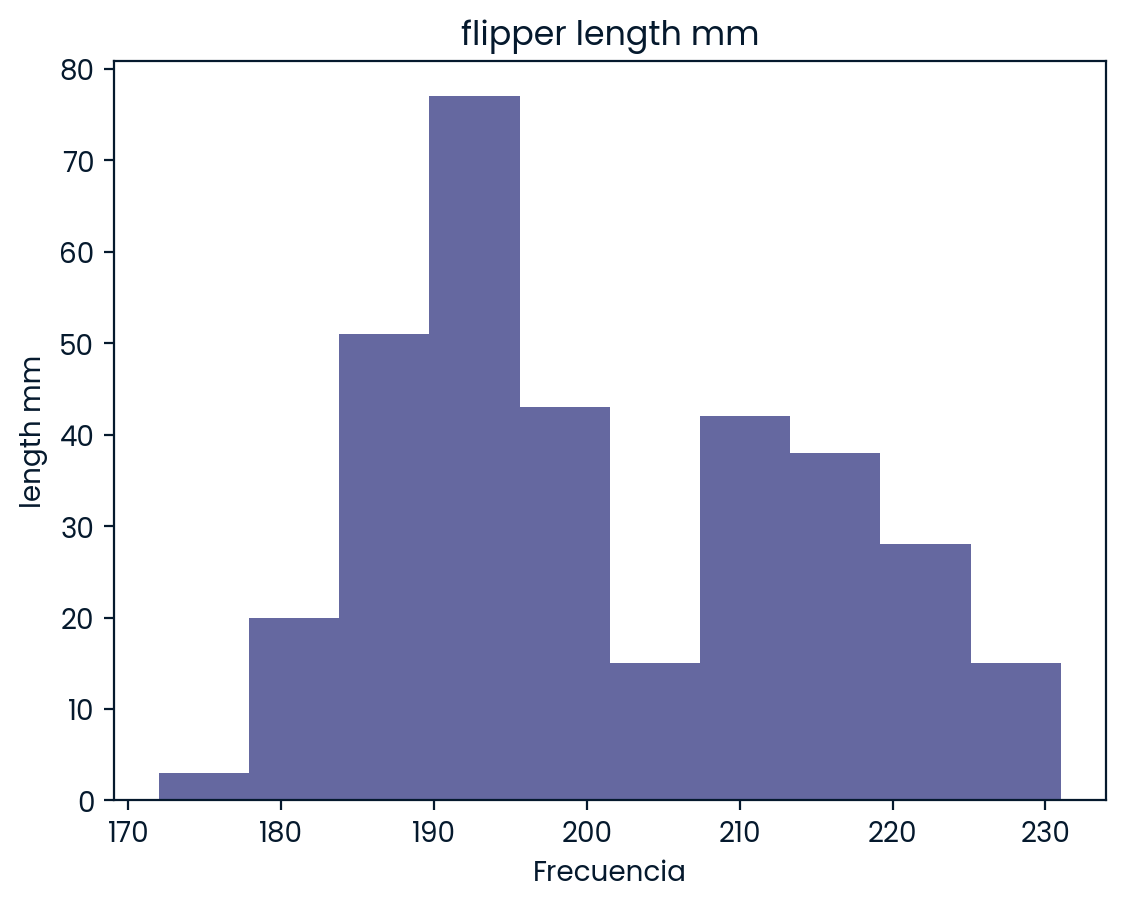

In [25]:
plt.hist(penguins_df['flipper_length_mm'],bins=10)
plt.title('flipper length mm')
plt.ylabel('length mm')
plt.xlabel('Frecuencia')
plt.show()

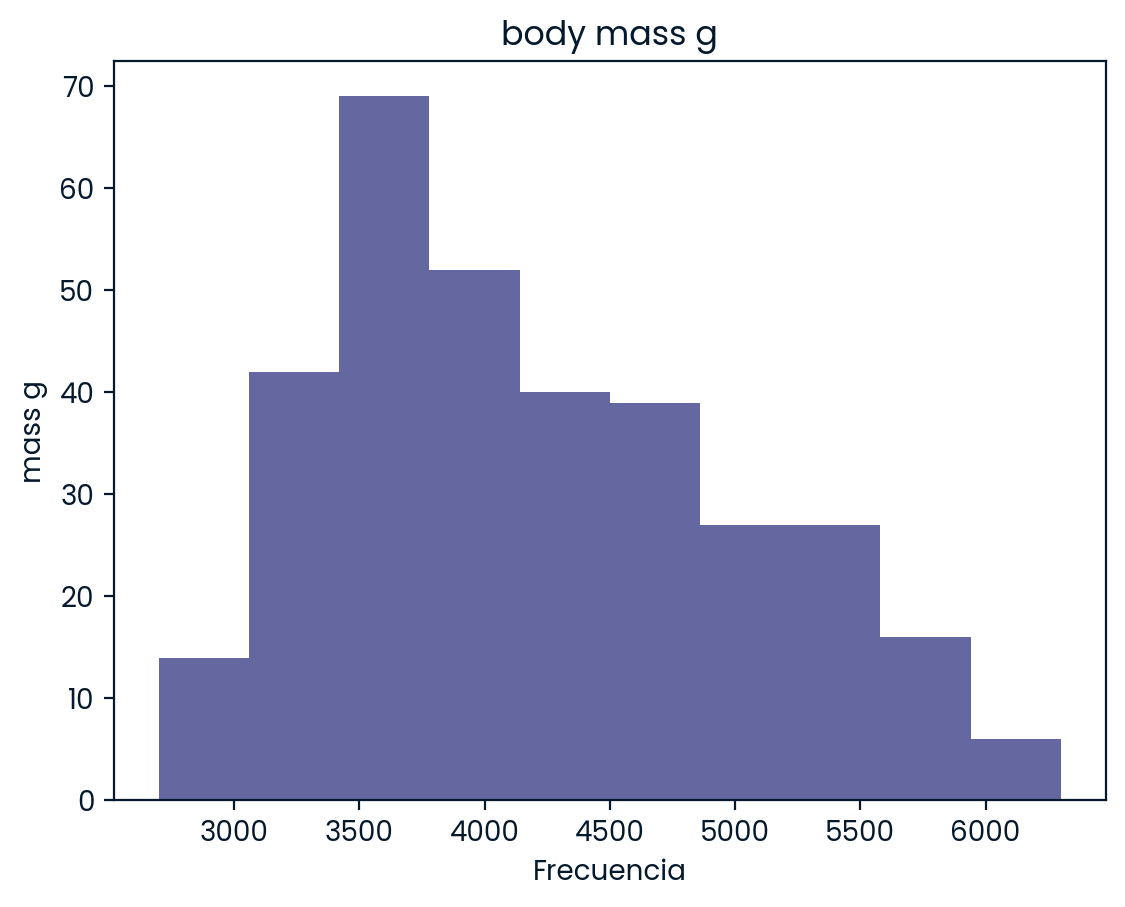

In [26]:
plt.hist(penguins_df['body_mass_g'],bins=10)
plt.title('body mass g')
plt.ylabel('mass g')
plt.xlabel('Frecuencia')
plt.show()

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)

In [28]:
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


In [29]:
ks = range(1,15)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(penguins_preprocessed)
    inertias.append(model.inertia_)

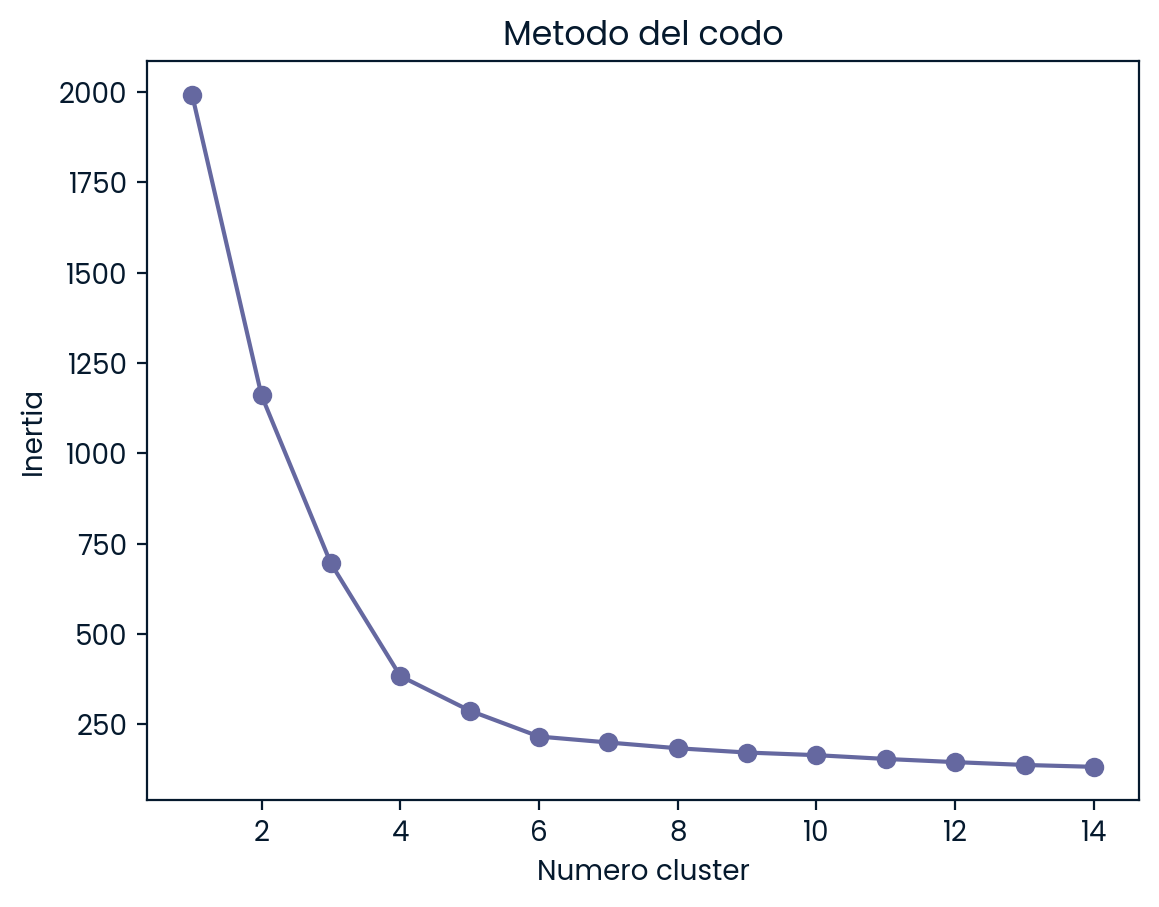

In [30]:
plt.plot(ks,inertias,'-o')
plt.title('Metodo del codo')
plt.xlabel('Numero cluster')
plt.ylabel('Inertia')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(penguins_preprocessed)

KMeans(n_clusters=5, random_state=42)

In [32]:
penguins_df['label'] = kmeans.labels_

In [33]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,2
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
3,36.7,19.3,193.0,3450.0,1,0,1
4,39.3,20.6,190.0,3650.0,0,1,2


In [34]:
penguins_df['label'].value_counts()

1    107
2     70
0     61
3     58
4     36
Name: label, dtype: int64

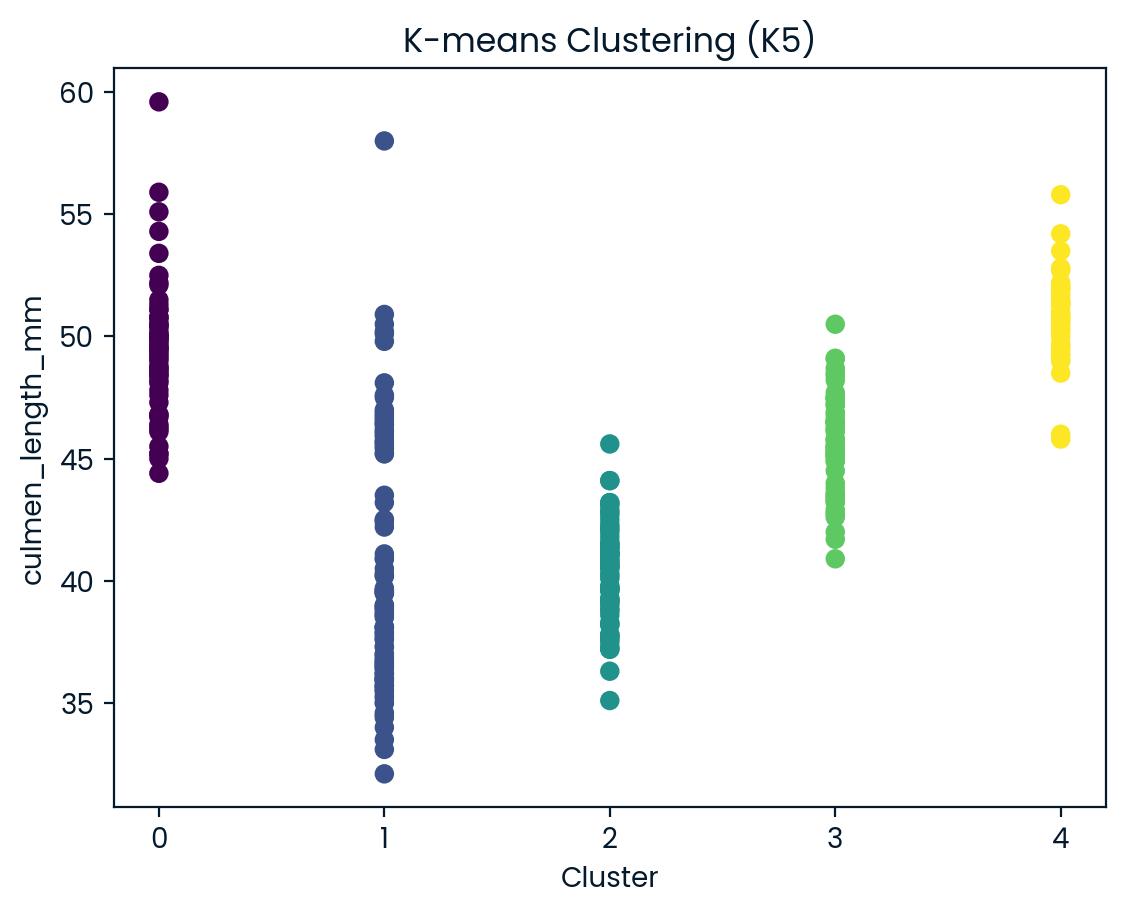

In [35]:
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K{5})')
plt.show()

In [36]:
# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,49.473770,15.718033,221.540984
1,40.217757,17.611215,189.046729
2,40.315714,19.011429,192.242857
3,45.563793,14.237931,212.706897
4,50.805556,19.305556,199.666667
